In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from Map import Map
from Tabu import Tabu
from TwoStage import TwoStage
from L_shaped import MasterProblem as mp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl 
import matplotlib.cm as cm
import time
import networkx as nx
import matplotlib as mpl

**Modelling Parameters**

In [3]:
rides = 5
bus = 1
scenarios = 25
MIPGap = 0.001
probability = [0.7, 0.1, 0.15, 0.05]

**Defining the Map**

In [4]:
mappy = Map(rides)

In [5]:
def Mod2(model=None):
    t2 = time.time()
    twosp = TwoStage(mappy, bus=bus, scenarios=scenarios, probability=probability)
    twosp.model.params.MIPGap = MIPGap
    if model is not None:
        for i,j,k in twosp.MP.variables.x.keys():
            twosp.MP.variables.x[i,j,k].start = model.variables.x[i,j,k].X
    twosp.optimize()
    t2 = time.time() - t2
    return twosp, t2

**Plotting Functions**

In [6]:
def plot_trend(ub,lb,base):
    x = list(range(len(ub)))
    figure = plt.figure()
    plt.plot(x,ub,label='upper-bound')
    plt.plot(x,[base]*len(ub),label='two-stage')
    plt.plot(x,lb,label='lower-bound')
    plt.annotate(int(ub[-1]),[x[-1],ub[-1]])
    plt.legend()
    plt.savefig('./figures/trend.png')
    plt.show()

colors = ['green','blue','yellow','red','pink'] 
def displaygraph(n, e, modname):
    for k in e.keys():
        for i, j in e[k]:
            plt.plot((n[i][0],n[j][0]),(n[i][1],n[j][1]), color=colors[k] ,marker='o', linewidth=2, linestyle='dashed')
    for i in n:
        plt.annotate(i,n[i],textcoords="offset points",xytext=(0,10),ha='center')
    plt.savefig('./figures/'+modname+'.png')
    plt.show()


In [7]:
twostage, t = Mod2()

Using license file C:\Users\lavkeshg\gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter NodefileStart to 0.5
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.001
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 8125 rows, 6226 columns and 31851 nonzeros
Model fingerprint: 0x49cf63c6
Variable types: 3340 continuous, 2886 integer (2886 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e-16, 4e-01]
  Bounds range     [1e+00, 3e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 994 rows and 1969 columns
Presolve time: 0.09s
Presolved: 7131 rows, 4257 columns, 25943 nonzeros
Variable types: 2225 continuous, 2032 integer (2032 binary)

Root relaxation: objective 1.732029e+01, 3760 iterations, 0.48 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  De

 29414  7430   34.52007   44  262   37.32000   30.81669  17.4%   162  260s
 29416  7434   30.81669   36  409   37.32000   30.81669  17.4%   162  272s
 29418  7437   30.81669   37  397   37.32000   30.81669  17.4%   163  283s
 29422  7437   30.81669   38  372   37.32000   30.81669  17.4%   163  293s
 29429  7441   30.81669   39  323   37.32000   30.81669  17.4%   163  297s
 29445  7450   30.81669   40  260   37.32000   30.81669  17.4%   163  300s
 29484  7474   32.36265   43  284   37.32000   30.81669  17.4%   163  305s
 29622  7491   30.81669   47  268   37.32000   30.81669  17.4%   163  310s
 29880  7523   30.81669   43  255   37.32000   30.81669  17.4%   164  316s
 29996  7536   36.86000   50  202   37.32000   30.81669  17.4%   164  321s
 30401  7630   35.37959   60  308   37.32000   30.81669  17.4%   164  325s
 31125  7663   30.96667   50  315   37.32000   30.81669  17.4%   165  330s
 31933  7709   34.82816   48  188   37.32000   30.81669  17.4%   165  335s
 32539  7729   34.15200  

Thread count was 8 (of 8 available processors)

Solution count 10: 36 36.2 36.36 ... 39.92

Optimal solution found (tolerance 1.00e-03)
Best objective 3.599999999691e+01, best bound 3.599999999691e+01, gap 0.0000%


for model in lshaped.submodel.values():
    print(model.relaxmod.status)
lshaped.submodel[1].relaxmod.computeIIS()
lshaped.submodel[1].relaxmod.write('./Reports/IIS/Infeasible.ilp')

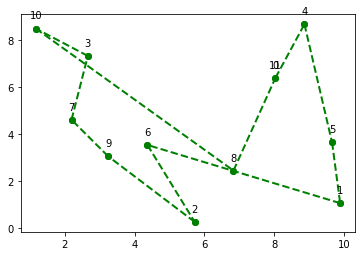

({0: (8.03175786801889, 6.385563261004748),
  1: (9.884391291875286, 1.0547632324240919),
  2: (5.720383270142763, 0.25601762778477144),
  3: (2.662929707430531, 7.320719714750375),
  4: (8.861828521878833, 8.66896243738729),
  5: (9.652691924332323, 3.6413895324157486),
  6: (4.367865627198975, 3.531038304371805),
  7: (2.1948605771432863, 4.603991384233213),
  8: (6.830780418445613, 2.4407941850230843),
  9: (3.242839969210128, 3.0497813888806924),
  10: (1.1726440304268293, 8.486123067054907),
  11: (8.03175786801889, 6.385563261004748)},
 {0: [(7, 3),
   (1, 6),
   (10, 8),
   (0, 4),
   (4, 5),
   (5, 1),
   (9, 7),
   (6, 2),
   (3, 10),
   (2, 9),
   (8, 0)]})

In [10]:
nodes = mappy.node
edges = {k:[] for k in range(twostage.bus)}
for i, j in twostage.parameters.edges:
    for k in range(twostage.bus):
        if twostage.MP.variables.x[i,j,k].X > 0.5:
            if j != twostage.last:
                edges[k].append((i,j))
            else:
                edges[k].append((i,0))

objtwosp = twostage.model.ObjVal
displaygraph(nodes, edges,'Two-Stage')
nodes,edges

In [14]:
twostage.model.status

2